**1. PRE-PROCESAMIENTO DE DATOS**


Al leer un archivo, se debe de indicar como estan codificados los datos, es por eso que se usa el encoding,para especificar latin1 la cual es la codificacion comun de los dataset gubernamentales, dado que evita errores de lectura asociados con acentos o la letra ñ

Todo lo que modifique el contenido de las columnas es preprocesamiento, lo que divida el data set sera la distribucion

In [36]:
# Clona el repositorio
!git clone https://github.com/estdanielscl/deeplearning.git

# Entra a la carpeta del repositorio
%cd deeplearning
import pandas as pd

df = pd.read_csv(
    "dataset.csv",
    encoding="latin1",
    sep=";"
)

df.head()


Cloning into 'deeplearning'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 3.66 MiB | 9.21 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/deeplearning/deeplearning/deeplearning/deeplearning/deeplearning


,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,RED,IPRESS,ID_PACIENTE,EDAD_PACIENTE,SEXO_PACIENTE,...,FEC_RESULTADO_1,DIFERIMIENTO_1,PROCEDIMIENTO_1,RESULTADO_1,UNIDADES_1,FEC_RESULTADO_2,PROCEDIMIENTO_2,RESULTADO_2,UNIDADES_2,DIFERIMIENTO_2
0,20241204,LIMA,LIMA,MIRAFLORES,150122,RED ASISTENCIAL REBAGLIATI,H.III SUAREZ-ANGAMOS,eJwzNDSyNDe0MLcwNjM1NrI0MAAAH10DeQ==,64,FEMENINO,...,20240503,79,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",106.00,mg/dL,20240503,TRIGLICERIDOS,273.0,mg/dL,79
1,20241204,LA LIBERTAD,TRUJILLO,VICTOR LARCO HERRERA,130111,RED ASISTENCIAL LA LIBERTAD,POL. VICTOR LARCO HERRERA,eJwzNrS0NLAwM7YwsjAwNAACAB9eA2s=,9,MASCULINO,...,20240504,70,TRIGLICERIDOS,57.00,mg/dL,20240504,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",84.0,mg/dL,70
2,20241204,CAJAMARCA,JAEN,JAEN,60801,RED ASISTENCIAL JAEN,H.II JAEN,eJwzNDYzNjY3M7A0Njc0MLcwsAQAHyADeg==,47,FEMENINO,...,20240518,82,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",90.83,mg/dL,20240518,TRIGLICERIDOS,54.9,mg/dL,82
3,20241204,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,RED ASISTENCIAL ALMENARA,H.I AURELIO DIAZ-UFANO Y PERAL,eJwzNjQ1NjUztLCwNLA0MTE0MAAAH0oDdA==,12,FEMENINO,...,20240518,73,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",83.00,mg/dL,20240518,TRIGLICERIDOS,85.0,mg/dL,73
4,20241204,CALLAO,CALLAO,VENTANILLA,70106,RED ASISTENCIAL SABOGAL,CAP III HNA. MARIA DONROSE SUTMOLLER,eJwzNje0NLMwMjQwNTAwNzQwNwMAHyIDcA==,2,MASCULINO,...,20240513,61,TRIGLICERIDOS,170.00,mg/dL,20240513,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",113.0,mg/dL,61


DIAGNOSTICO DEL DATASET

Se ven:
- Número de registros y columnas
- Tipos de datos
- Columnas con valores nulos

In [37]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63799 entries, 0 to 63798
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FECHA_CORTE             63799 non-null  int64  
 1   DEPARTAMENTO            63799 non-null  object 
 2   PROVINCIA               63799 non-null  object 
 3   DISTRITO                63799 non-null  object 
 4   UBIGEO                  63799 non-null  int64  
 5   RED                     63799 non-null  object 
 6   IPRESS                  63799 non-null  object 
 7   ID_PACIENTE             63799 non-null  object 
 8   EDAD_PACIENTE           63799 non-null  int64  
 9   SEXO_PACIENTE           63799 non-null  object 
 10  EDAD_MEDICO             63799 non-null  int64  
 11  ID_MEDICO               63799 non-null  object 
 12  COD_DIAG                63799 non-null  object 
 13  DIAGNOSTICO             63799 non-null  object 
 14  AREA_HOSPITALARIA       63799 non-null

,0
FECHA_CORTE,0
DEPARTAMENTO,0
PROVINCIA,0
DISTRITO,0
UBIGEO,0
RED,0
IPRESS,0
ID_PACIENTE,0
EDAD_PACIENTE,0
SEXO_PACIENTE,0


1.1 ELIMINACION DE COLUMNAS INNECESARIAS

Se eliminan todas las columnas que no aportan al modelo predictivo (columnas de tipo administrativas)



In [38]:
cols_to_drop = [
    'FECHA_CORTE',
    'DISTRITO',
    'UBIGEO',
    'RED',
    'PROVINCIA',
    'DEPARTAMENTO',
    'FEC_RESULTADO_1',
     'FEC_RESULTADO_2',
    'IPRESS',
    'ID_PACIENTE',
    'EDAD_MEDICO',
    'ID_MEDICO',
    'AREA_HOSPITALARIA',
    'ACTIVIDAD_HOSPITALARIA',
    'FECHA_MUESTRA',
    'DIFERIMIENTO_1',
    'DIFERIMIENTO_2',
    'UNIDADES_1',
    'UNIDADES_2'


]

cols_to_drop = [c for c in cols_to_drop if c in df.columns]# Verifica que las columnas existan en el dataframe (solo se queda lo que existe)
df = df.drop(columns=cols_to_drop)# Elimina definitivamente las columnas del dataset

1.2 ELIMINACION DE PACIENTES DUPLICADOS

In [39]:
df = df.drop_duplicates()# Elimina las filas repetidas,sino el modelo veria el mismo paciente varias veces


In [40]:
df.head()

,EDAD_PACIENTE,SEXO_PACIENTE,COD_DIAG,DIAGNOSTICO,SERVICIO_HOSPITALARIO,PROCEDIMIENTO_1,RESULTADO_1,PROCEDIMIENTO_2,RESULTADO_2
0,64,FEMENINO,E03.9,"HIPOTIROIDISMO, NO ESPECIFICADO",ENDOCRINOLOGIA,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",106.00,TRIGLICERIDOS,273.0
1,9,MASCULINO,E66.3,SOBREPESO,PEDIATRIA,TRIGLICERIDOS,57.00,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",84.0
2,47,FEMENINO,E66.9,"OBESIDAD, NO ESPECIFICADA",MEDICINA INTERNA,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",90.83,TRIGLICERIDOS,54.9
3,12,FEMENINO,E66.9,"OBESIDAD, NO ESPECIFICADA",PEDIATRIA,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",83.00,TRIGLICERIDOS,85.0
4,2,MASCULINO,E66.9,"OBESIDAD, NO ESPECIFICADA",PEDIATRIA,TRIGLICERIDOS,170.00,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",113.0


1.3 CONVERSION DE VARIABLES CATEGORICAS




In [41]:
from sklearn.preprocessing import LabelEncoder # Convierte la categoria de textos a numeros

cat_cols = df.select_dtypes(include='object').columns # Busca las columnas cuyo tipo sea objeto.

encoders = {}# Crea un diccionario para indicar el reemplazo del texto por un numero

for col in cat_cols: # Recorre cada columna categorica, una por una
    le = LabelEncoder() # Crea un codificador para cada columna
    df[col] = le.fit_transform(df[col])# Ajusta y transforma fit (aprende las categorias unicas de las columnas) y transf (transf a numeros)
    encoders[col] = le


1.4 SEPARACION DE VARIABLES X Y ETIQUETA Y

In [42]:

target = 'DIAGNOSTICO'# Se define la variable objetivo, que se desea predecir

X = df.drop(columns=[target])# Crea las entradas del modelo, tomando todas las columnas expecto diagnostico
y = df[target]#extrae la columna diagnostico


2.1 **DISTRIBUCION DE DATOS**

Se realiza una aleatorizacion en cada variable por un valor especifico de la siguiente manera:
- Entrenamiento: 70
- Validacion: 15
- Test: 15

In [43]:
from sklearn.model_selection import train_test_split # Importa la funcion que divide los datos de forma aleatoria y controlada

# Train + Validation (85%)/  test (15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, shuffle=True
)# El conjunto de los datos de test se dividen primero por ser un conjunto independiente

# Train (70%) / Validation (15%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.176, random_state=42# Fija la aleatoriedad
)


NORMALIZACION/ESTANDARIZACION
- Pone a todas las variables en la misma escala
- Evita que una variable sea mas importante que al otra

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()#crea un escalador para aplicar la estandarizacion estadistica
X_train = scaler.fit_transform(X_train)#fit calcula para cada columna media y desviacion std  asegura una escala homgenea
# Solo transform en validación y test (aplica la escala aprendida del entrenamiento)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


CONVERCION A TENSORFLOW
- Conversion de matrices a tensores
- Convierte de numpy a tensores
- float x int y

In [45]:
import tensorflow as tf

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_val   = tf.convert_to_tensor(X_val, dtype=tf.float32)
X_test  = tf.convert_to_tensor(X_test, dtype=tf.float32)

y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_val   = tf.convert_to_tensor(y_val, dtype=tf.int32)
y_test  = tf.convert_to_tensor(y_test, dtype=tf.int32)# Etiquetas/labels


DEFINICION DEL MODELO MLP
- Sequential indica que las capas son secuenciales

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout # Herramientas para constuir la red neuronal multicapa (MLP)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),# Capa de entrada oculta
    Dropout(0.3), # Reduce el sobreajuste sin afectar la capacidad de entrenamietno del modelo

    Dense(64, activation='relu'),
    Dropout(0.3),# Cada iteracion apaga el 30% de las neuronas para que no dependa siempre de las mismas

    Dense(32, activation='relu'),

    Dense(len(tf.unique(y_train)[0]), activation='softmax')# Capa de salida
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


COMPILACION DEL MODELO

In [47]:
model.compile(
    optimizer='adam',# adam ajusta automaticamente el LR (Optimizador)
    loss='sparse_categorical_crossentropy',# Variable objetivo clasificada como datos enteros (función de perdida)
    metrics=['accuracy']
)


resumen del modelo

In [48]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,785 (46.04 KB)

 Trainable params: 11,785 (46.04 KB)

 Non-trainable params: 0 (0.00 B)

ENTRENAMIENTO DEL MODELO HIPERPARAMETROS

In [49]:
history = model.fit(#model fit ajusta los pesos
    X_train,
    y_train,
    validation_data=(X_val, y_val),#hiperparametros
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
1395/1395 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8379 - loss: 0.4964 - val_accuracy: 0.9928 - val_loss: 0.0237
Epoch 2/50
1395/1395 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9898 - loss: 0.0431 - val_accuracy: 0.9967 - val_loss: 0.0133
Epoch 3/50
1395/1395 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9943 - loss: 0.0259 - val_accuracy: 0.9987 - val_loss: 0.0134
Epoch 4/50
1395/1395 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9955 - loss: 0.0229 - val_accuracy: 0.9986 - val_loss: 0.0082
Epoch 5/50
1395/1395 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9970 - loss: 0.0168 - val_accuracy: 0.9987 - val_loss: 0.0093
Epoch 6/50
1395/1395 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9971 - loss: 0.0154 - val_accuracy: 0.9987 - val_loss: 0.0074
Epoch 7/50
1395/1395 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9968 - loss: 0.0164 - val_accuracy: 0.9987 - val_loss: 0.0071
Epoch 8/50
1395/1395 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9970 - loss: 0.0157 - 

VISUALIZACION DEL ENTRENAMIENTO

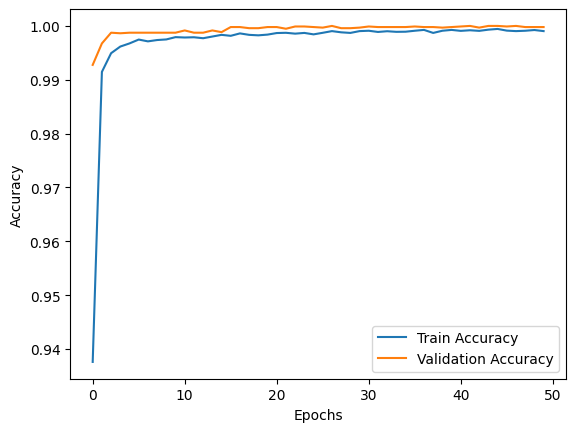

In [50]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label='Presición de Train')
plt.plot(history.history['val_accuracy'], label='Presición de Validation')
plt.xlabel('Epocas')
plt.ylabel('Presición')
plt.legend()
plt.show()


EVALUACION EN EL CONJUNTO DE TEST

In [51]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Accuracy en Test: {test_accuracy:.4f}")


Accuracy en Test: 0.9998


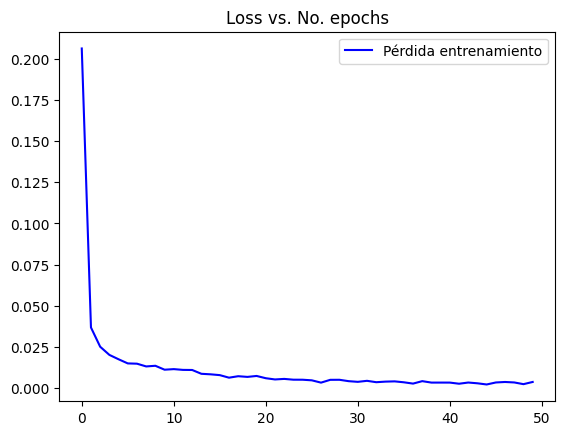

In [52]:
# Gráfica de Loss
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Pérdida entrenamiento')
plt.title('Perdida vs. # de epocas')
plt.legend()
plt.show()

In [53]:
import numpy as np

# Seleccionar un índice aleatorio
idx = np.random.randint(0, X_test.shape[0])

# Ejemplo real
sample = X_test[idx:idx+1]

# Predicción del modelo
pred = model.predict(sample)
pred_class = np.argmax(pred)

print("Clase real:", y_test[idx].numpy())
print("Clase predicha:", pred_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Clase real: 5
Clase predicha: 5


In [54]:
import numpy as np

# Seleccionar un paciente aleatorio del conjunto de prueba
idx = np.random.randint(0, X_test.shape[0])

paciente = X_test[idx:idx+1]

# Predicción
pred = model.predict(paciente)
pred_class = np.argmax(pred)

# Convertir etiqueta numérica a diagnóstico original
diagnostico_predicho = encoders['DIAGNOSTICO'].inverse_transform([pred_class])[0]
diagnostico_real = encoders['DIAGNOSTICO'].inverse_transform([y_test[idx].numpy()])[0]

print("Paciente:", idx)
print("Diagnóstico real:     ", diagnostico_real)
print("Diagnóstico predicho:", diagnostico_predicho)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Paciente: 3820
Diagnóstico real:      OTROS TIPOS DE OBESIDAD
Diagnóstico predicho: OTROS TIPOS DE OBESIDAD


MATRIZ DE CONFUSION: Permite ver errores por cada clase

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


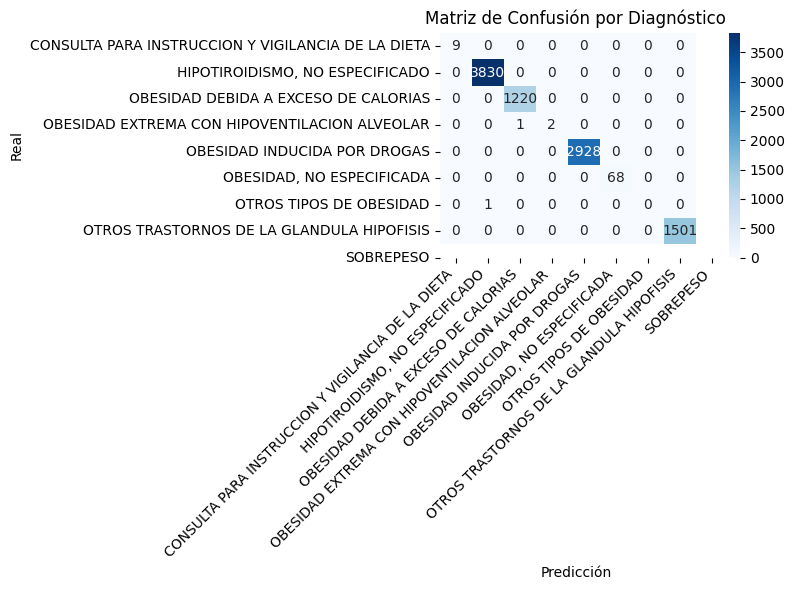

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = tf.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

# Extrae los nombres reales de los diagnósticos
nombres_clases = encoders['DIAGNOSTICO'].classes_
plt.figure(figsize=(8,6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nombres_clases,
            yticklabels=nombres_clases)

plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión por Diagnóstico')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()
